In [524]:
import numpy as np
import pandas as pd

In [525]:
df = pd.read_csv("train_data.csv", index_col=['Id'], na_values="?")
df.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
Id,,,,,,,,,,,,,,,
16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


In [526]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32560 entries, 16280 to 48839
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       30724 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education.num   32560 non-null  int64 
 5   marital.status  32560 non-null  object
 6   occupation      30717 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital.gain    32560 non-null  int64 
 11  capital.loss    32560 non-null  int64 
 12  hours.per.week  32560 non-null  int64 
 13  native.country  31977 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


14 variáveis diferentes, treze independentes e uma de classe
variável de classe é aquilo que queremos prever
6 dessas variáveis são numéricas, enquanto as 7 outras são categóricas
as númericas são mais fácies de trabalhar e do computador compreender
enquanto que as demais precisam ser transformadas em número

In [527]:
# estatísticas dos dados numéricos
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Se o primeiro quartil, mediana e terceiro quartil são próximos (Q3-Q1/mediana < 0.5), isso indica uma distribuição de dados concentrada, pouco espalhada
Aqui podemos ver que capital gain e loss estão bem concentradas, pois os 3 valores são iguais

Se a média for muito diferente da mediana (mean e 50%), pode indicar uma distribuição assimétrica (abs(média-mediana)/mediana > 0.1 indica assimetria relevante, acima de 0.3 é uma assimetria forte)
Novamente comportamento percebido no gain e loss

Se std muito alto (std/media > 0.5 alta, > 1.0 muito alta), indica que os dados estão bem dispersos, novamente gain e loss se destacam

Gain parece ter outliers devido ao seu grande desvio padrão e seu máximo de 99999

In [528]:
import matplotlib.pyplot as plt
import seaborn as sns

Vamos transformar a colune income para valores binários 0 e 1 para podermos trabalhar mais facilmente com a variável de classe

In [529]:
df_analysis = df.copy()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_analysis['income'] = le.fit_transform(df_analysis['income'])
df_analysis['income']

Id
16280    0
16281    0
16282    0
16283    0
16284    1
        ..
48835    1
48836    0
48837    0
48838    0
48839    0
Name: income, Length: 32560, dtype: int64

In [530]:
df_numeric = df_analysis.select_dtypes(include=[np.number])
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32560 entries, 16280 to 48839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32560 non-null  int64
 1   fnlwgt          32560 non-null  int64
 2   education.num   32560 non-null  int64
 3   capital.gain    32560 non-null  int64
 4   capital.loss    32560 non-null  int64
 5   hours.per.week  32560 non-null  int64
 6   income          32560 non-null  int64
dtypes: int64(7)
memory usage: 2.0 MB


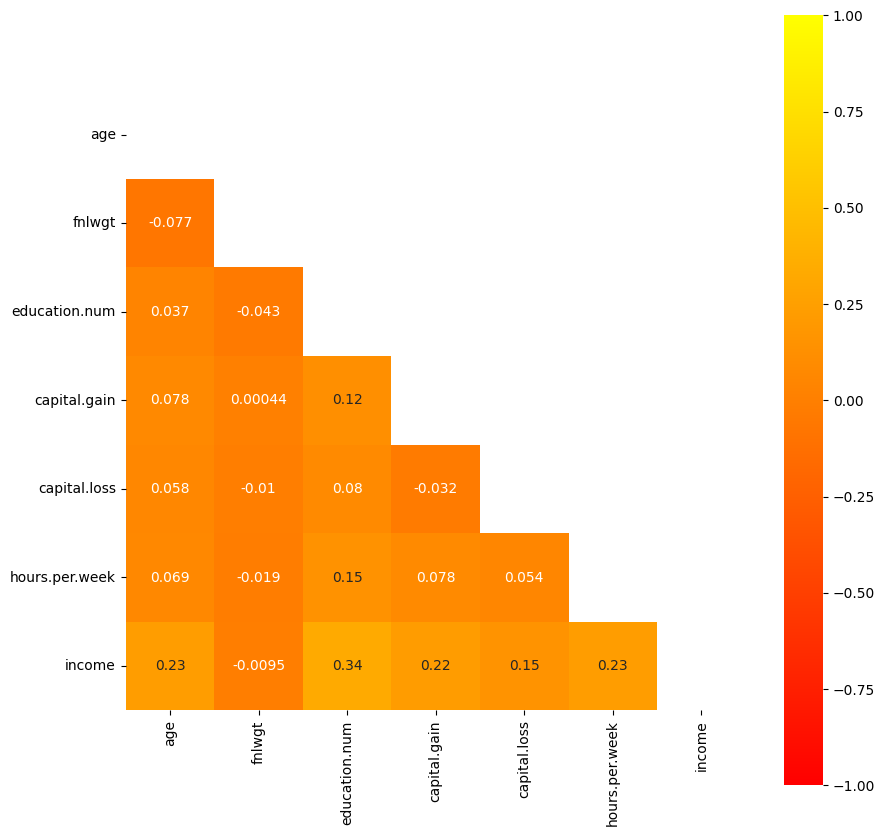

In [531]:
mask = np.triu(np.ones_like(df_numeric.corr(), dtype=np.bool_))

plt.figure(figsize=(10,10))

sns.heatmap(df_numeric.corr(), mask=mask, square = True, annot=True, vmin=-1, vmax=1, cmap='autumn')
plt.show()

Podemos ver que tdas as variáveis possuem algum grau de correlação com "income", menos "fnlwgt" com correlação -0.0095
Parece não ter valor em usar essa variável para nosso modelo

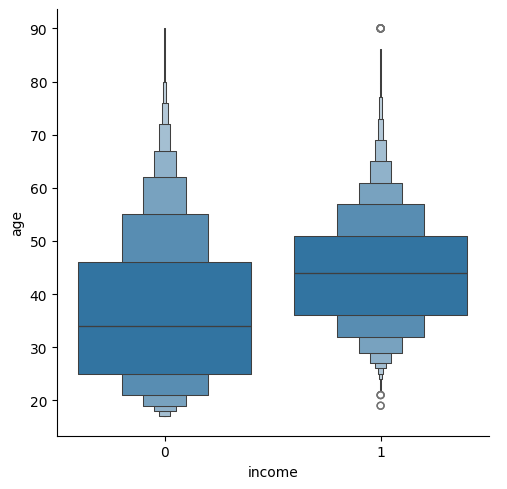

In [532]:
sns.catplot(x='income', y='age', kind="boxen", data=df_analysis)

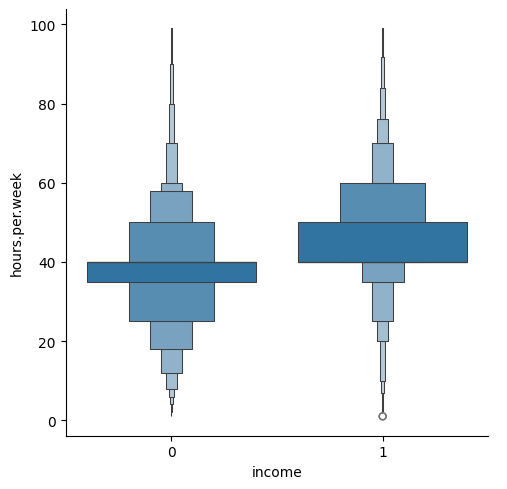

In [533]:
sns.catplot(x='income', y='hours.per.week', kind="boxen", data=df_analysis)

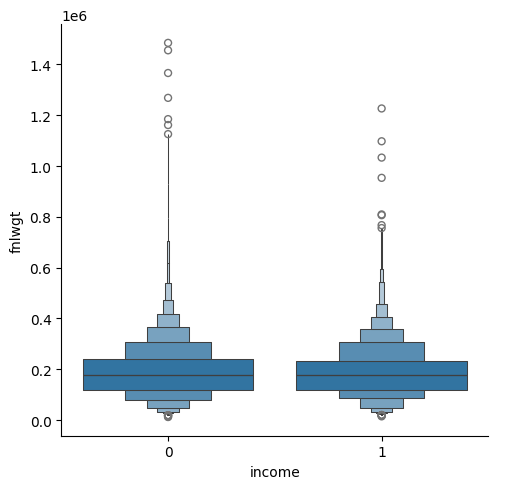

In [534]:
sns.catplot(x='income', y='fnlwgt', kind="boxen", data=df_analysis)

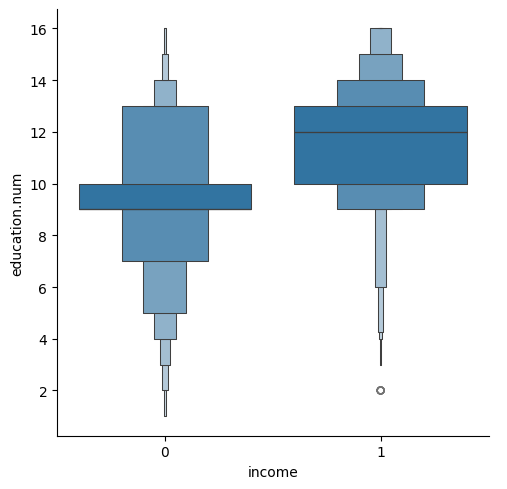

In [535]:
sns.catplot(x='income', y='education.num', kind="boxen", data=df_analysis)

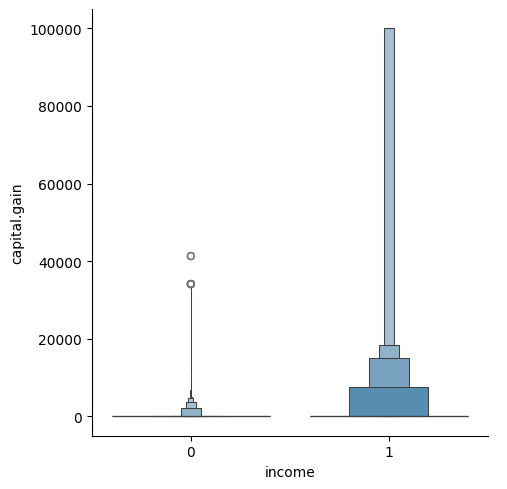

In [536]:
sns.catplot(x='income', y='capital.gain', kind="boxen", data=df_analysis)

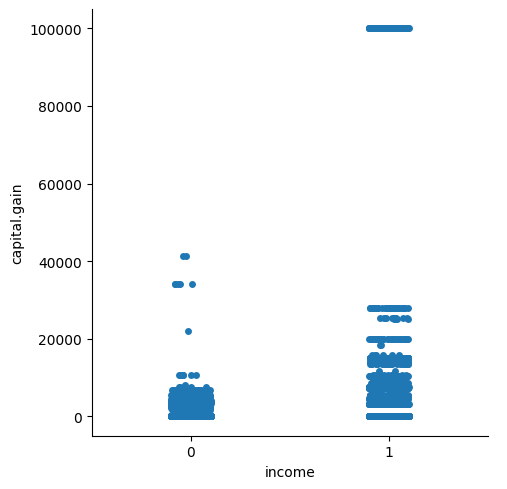

In [537]:
sns.catplot(x='income', y='capital.gain', data=df_analysis, kind='strip')

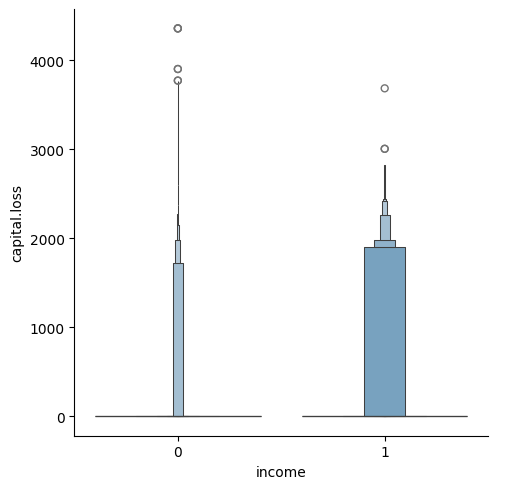

In [538]:
sns.catplot(x='income', y='capital.loss', kind="boxen", data=df_analysis)

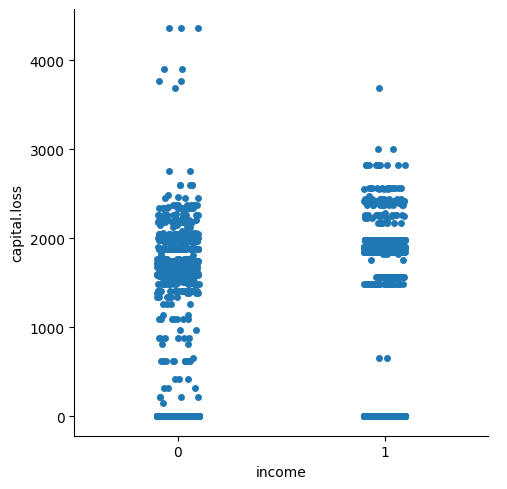

In [539]:
sns.catplot(x='income', y='capital.loss', data=df_analysis)

Com esses gráficos podemos ter uma certeza maior de que o peso realmente não importa

Além disso, capital.gain e .loss de fato estão bem esparsas e possuem outliers. Essa informação é importante para nossa análise, mas os dados precisam ser pré-processados

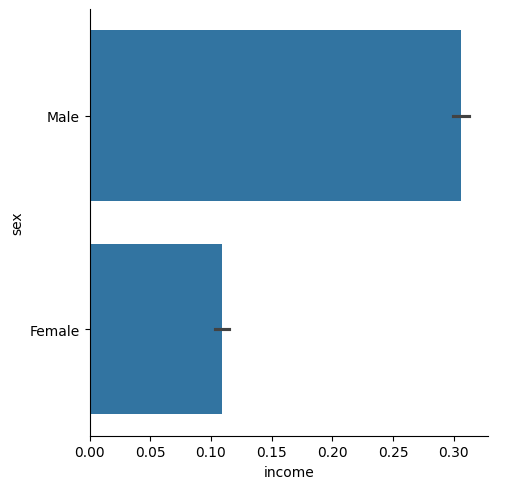

In [540]:
sns.catplot(y='sex', x='income', kind='bar', data=df_analysis)

Esse gráfico indica que 10% das mulheres ganham mais de 50k e 30% dos homens ganham mais

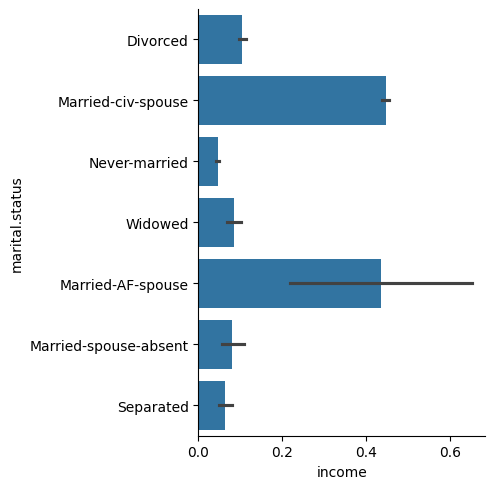

In [541]:
sns.catplot(y='marital.status', x='income', kind='bar', data=df_analysis)

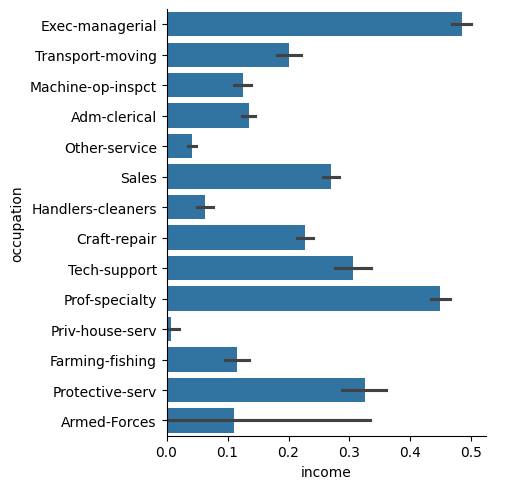

In [542]:
sns.catplot(y='occupation', x='income', kind='bar', data=df_analysis)

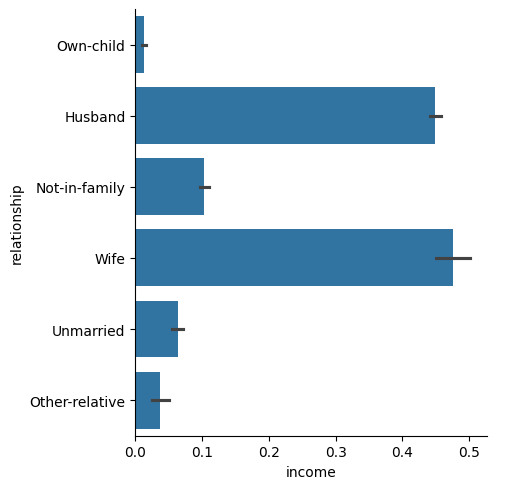

In [543]:
sns.catplot(y='relationship', x='income', kind='bar', data=df_analysis)

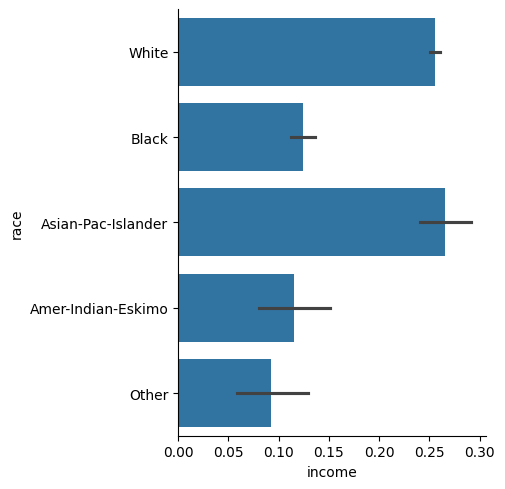

In [544]:
sns.catplot(y='race', x='income', kind='bar', data=df_analysis)

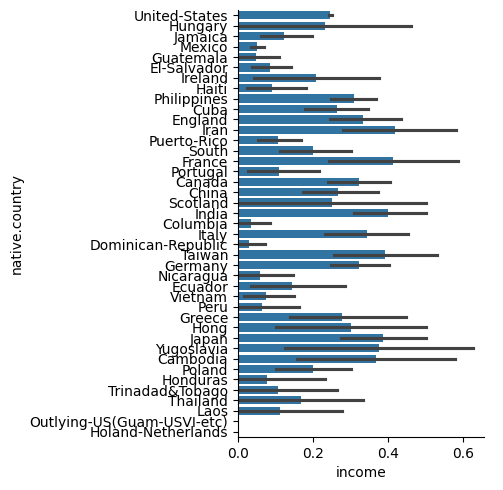

In [545]:
sns.catplot(y='native.country', x='income', kind='bar', data=df_analysis)

Todas as variáveis parecem estar ligadas com a renda das pessoas

As linhas pretas representam a variação de renda dentro de cada grupo. A maioria ds países possui uma variação muito grande, tão grande que não podemos ter clareza de seu valore real

In [546]:
df_analysis['native.country'].value_counts()

native.country
United-States                 29169
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

Podemos lidar com esse problema (ver se algum outro tratou isso ou só retirou os dados também)

Limpeza dos dados

In [547]:
df = pd.read_csv("train_data.csv", index_col=['Id'], na_values="?")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
Id,,,,,,,,,,,,,,,
16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


In [548]:
df.drop_duplicates(keep='first', inplace=True)

In [549]:
df = df.drop(['fnlwgt', 'native.country'], axis=1)

In [550]:
df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
Id,,,,,,,,,,,,,
16280,34,Private,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,<=50K
16281,58,Local-gov,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,<=50K
16282,25,Private,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,<=50K
16283,24,Private,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,<=50K
16284,57,Self-emp-inc,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,>50K


In [551]:
Y_train = df.pop('income')

X_train = df

In [552]:
X_train.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week
Id,,,,,,,,,,,,
16280,34,Private,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44
16281,58,Local-gov,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40
16282,25,Private,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42
16283,24,Private,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40
16284,57,Self-emp-inc,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60


Pré-processamento dos dados

In [553]:
numerical_cols = list(X_train.select_dtypes(include=[np.number]).columns.values)

numerical_cols.remove('capital.gain')
numerical_cols.remove('capital.loss')

sparse_cols = ['capital.gain', 'capital.loss']

categorical_cols = list(X_train.select_dtypes(exclude=[np.number]).columns.values)

print("Colunas numéricas: ", numerical_cols)
print("Colunas esparsas: ", sparse_cols)
print("Colunas categóricas: ", categorical_cols)

Colunas numéricas:  ['age', 'education.num', 'hours.per.week']
Colunas esparsas:  ['capital.gain', 'capital.loss']
Colunas categóricas:  ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']


Dados categóricos

In [554]:
from sklearn.impute import SimpleImputer

simple_imputer = SimpleImputer(strategy='most_frequent')
# testar com mediana e média também

In [555]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder(drop='if_binary')
# transforma os n categorias em n colunas, sendo 1 na coluna correspondente
# a informação e 0 nas demais

In [556]:
from sklearn.pipeline import Pipeline

categorial_pipeline = Pipeline(steps= [
    ('imputer', simple_imputer),
    ('onehot', one_hot)
])

Dados numéricos

In [557]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=10, weights="uniform")
# usa o dado faltante como variável de classe e usa knn para decidir
# o dado faltante

In [558]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# média 0 e desvio padrão 1 para todas as variáveis

In [559]:
numerical_pipeline = Pipeline(steps= [
    ('imputer', knn_imputer),
    ('scaler', scaler)
])

Dados esparsos

In [560]:
from sklearn.preprocessing import RobustScaler

sparse_pipeline = Pipeline(steps=[
    ('imputer', knn_imputer),
    ('scaler', RobustScaler())
])

In [561]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_cols),
    ('spr', sparse_pipeline, sparse_cols),
    ('cat', categorial_pipeline, categorical_cols),
])

In [562]:
X_train = preprocessor.fit_transform(X_train)

Predição

In [563]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20)

Cross-validation com os dados

In [564]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score


scorers = {
    "accuracy": "accuracy",
    "precision": make_scorer(precision_score, pos_label='>50K'),
    "recall": make_scorer(recall_score, pos_label='>50K')
}

for metric_name, scorer in scorers.items():
    scores = cross_val_score(knn, X_train, Y_train, cv=50, scoring=scorer)
    print(f"{metric_name.capitalize()} com cross-validation: {scores.mean():.4f}")

Accuracy com cross-validation: 0.8652
Precision com cross-validation: 0.7595
Recall com cross-validation: 0.6462


  Acc | Pre | Recall
0.8683 & 0.7712 & 0.6449 & sem as colunas ['fnlwgt', 'native.country', 'education], most_frequent e 10nn e 20nn final, cv 5 \\
0.8644 & 0.7586 & 0.6414 & com todas as colunas, most_frequent e 10nn e 20nn final \\
0.8645 & 0.7588 & 0.6415 & com todas as colunas sem apagar dados duplicados \\
0.8374 & 0.7713 & 0.4619 & sem pipeline de dados categóricos  \\
0.8335 & 0.6833 & 0.5752 & sem pipeline de dados esparsos  \\
0.8573 & 0.7586 & 0.5980 & sem pipeline numérica  \\
0.8256 & 0.6828 & 0.5151 & sem pipeline numérica e de dados  esparsos \\
0.8291 & 0.9523 & 0.3054 & sem pipeline numérica e de dados  categóricos \\
0.7910 & 0.6161 & 0.3508 & sem pipeline de dados esparsos e  categóricos \\
0.8682 & 0.7692 & 0.6478 & filtros e limpagens, cv 10  \\
0.6459 & 0.7680 & 0.6459 & filtros e limpagens, cv 50  \\

Usando os dados de teste

In [565]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=20)

In [566]:
test_data = pd.read_csv("test_data.csv", index_col=['Id'], na_values="?")

In [567]:
X_test = test_data.drop(['fnlwgt', 'native.country', 'education'], axis=1)

In [568]:
X_test = preprocessor.transform(X_test)

ValueError: columns are missing: {'education'}

In [ ]:
predictions = knn.predict(X_test)